In [66]:
#Import Important Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [67]:
#Downloading Dataset

!gdown 1uuBCtiihGxx85czcXc-R804_VxENPPtR

Downloading...
From: https://drive.google.com/uc?id=1uuBCtiihGxx85czcXc-R804_VxENPPtR
To: /content/campaign.csv
100% 220k/220k [00:00<00:00, 72.9MB/s]


In [68]:
#Assigning Dataset

df = pd.read_csv("campaign.csv")

#Analysing Dataset

In [69]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,4,6,1,0,0,0,0,0,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,3,7,5,0,0,0,0,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,2,5,2,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,0,2,7,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,1,2,7,1,0,0,0,0,0,SP


In [70]:
#Datatype Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2239 non-null   int64 
 1   Year_Birth           2239 non-null   int64 
 2   Education            2239 non-null   object
 3   Marital_Status       2239 non-null   object
 4   Income               2239 non-null   object
 5   Kidhome              2239 non-null   int64 
 6   Teenhome             2239 non-null   int64 
 7   Dt_Customer          2239 non-null   object
 8   Recency              2239 non-null   int64 
 9   MntWines             2239 non-null   int64 
 10  MntFruits            2239 non-null   int64 
 11  MntMeatProducts      2239 non-null   int64 
 12  MntFishProducts      2239 non-null   int64 
 13  MntSweetProducts     2239 non-null   int64 
 14  MntGoldProds         2239 non-null   int64 
 15  NumDealsPurchases    2239 non-null   int64 
 16  NumWeb

In [71]:
#Finding Null Percentage

df.isna().sum() / len(df) * 100

,0
ID,0.0
Year_Birth,0.0
Education,0.0
Marital_Status,0.0
Income,0.0
Kidhome,0.0
Teenhome,0.0
Dt_Customer,0.0
Recency,0.0
MntWines,0.0


Insights : There is no null values in the dataset.

In [72]:
# Removing '$' from Income and converting it to float datatype

df["Income"] = df["Income"].str.replace('$', '').str.replace(',','').astype(float)

#Filling null values with mean of Income

df["Income"] = df["Income"].fillna(df["Income"].mean())

Insights : There were 24 null values in income column, which we replaced with mean because the data was not sckewed.

In [73]:
df["date"] = df["Dt_Customer"].str.split("/", expand = True)[1] # Extracting date of purchase
df["month"] = df["Dt_Customer"].str.split("/", expand = True)[0] # Extracting month of purchase
df["year"] = df["Dt_Customer"].str.split("/", expand = True)[2] # Extracting year of purchase

#Statistical Analysis

In [74]:
#Statistical Analysis of Numerical Column

df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2239.0,5590.444841,3246.372471,0.0,2827.5,5455.0,8423.5,11191.0
Year_Birth,2239.0,1968.802144,11.985494,1893.0,1959.0,1970.0,1977.0,1996.0
Income,2239.0,51969.861400,21410.586353,1730.0,35533.5,51717.0,68277.5,162397.0
Kidhome,2239.0,0.443948,0.538390,0.0,0.0,0.0,1.0,2.0
Teenhome,2239.0,0.506476,0.544555,0.0,0.0,0.0,1.0,2.0
Recency,2239.0,49.121036,28.963662,0.0,24.0,49.0,74.0,99.0
MntWines,2239.0,304.067441,336.614830,0.0,24.0,174.0,504.5,1493.0
MntFruits,2239.0,26.307727,39.781468,0.0,1.0,8.0,33.0,199.0
MntMeatProducts,2239.0,167.016525,225.743829,0.0,16.0,67.0,232.0,1725.0
MntFishProducts,2239.0,37.538633,54.637617,0.0,3.0,12.0,50.0,259.0


Insights :

1.  Demographics:

  * Average Birth Year: Most customers were born around 1968, with a majority   falling between 1959 and 1977.

  * Average Income: The average income is approximately $51,970, with a wide range from $1,730 to $162,397.

  * Household Composition: On average, households have 0.44 children and 0.51 teenagers, indicating that many customers likely have small families or no children at home.

2.  Purchase Behavior:

  * Wine Purchases: Customers spend the most on wine, with an average of $304, significantly higher than other product categories.

  * Meat Products: After wine, meat products are the second most purchased category, with an average spending of $167.

  * Deals and Promotions: On average, customers participate in 2.32 deals purchases, indicating moderate engagement with promotions.

3.  Shopping Channels:

  * Store Purchases: Customers make the most purchases in physical stores, with an average of 5.79 purchases.

  * Web Purchases: Web purchases average 4.08, showing that online shopping is also popular among these customers.
  * Catalog Purchases: Catalog purchases are less frequent, with an average of  2.66 purchases.

4.  Campaign Acceptance: Campaigns generally have low acceptance rates, with less than 7.5% of customers accepting any campaign. The AcceptedCmp2 campaign had the lowest acceptance rate at 1.3%.
Complaints:

5.  Complaints are rare, with only 0.9% of customers having lodged a complaint, indicating overall customer satisfaction.

In [75]:
#Statistical Analysis of Categorical Column

df.describe(include = 'object')

,Education,Marital_Status,Dt_Customer,Country,date,month,year
count,2239,2239,2239,2239,2239,2239,2239
unique,5,8,663,8,31,12,3
top,Graduation,Married,8/31/12,SP,12,8,13
freq,1126,864,12,1095,103,222,1188


Insights :

1.  Education:  The majority of customers (50.3%) have a Graduation level of education.

2.  Marital Status: Married customers make up the largest group, with 864 individuals, indicating that married individuals are a significant portion of the customer base.

3.  Customer Acquisition: The most common customer acquisition date is August 31, 2012, with 12 customers joining on that date.
Geographic Distribution:

4.  The most frequent country listed is SP (likely Spain), with 1,095 customers, suggesting a strong customer base in that region.
Date Analysis:

5.  December is the most common month for the data records, with 103 occurrences.

6.  The most frequent day is the 8th, with 222 records.

7.  The year 2013 dominates the dataset, with 1,188 records, indicating that a significant amount of customer data is from this year.

In [76]:
#create total spending column

df["Total_spending"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

#Basic EDA

In [77]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Country', 'date', 'month', 'year',
       'Total_spending'],
      dtype='object')

In [78]:
df["date"].value_counts()

,count
date,
12,103
17,91
22,89
23,89
11,83
7,83
29,82
10,79
18,78


Insights : Most customers enrolled in the 12th.

In [79]:
df["month"].value_counts()

,count
month,
8,222
5,216
10,212
3,211
1,197
9,193
11,187
4,182
2,178


Insights : Most customers enrolled in the month of August.

In [80]:
df["year"].value_counts()

,count
year,
13,1188
14,557
12,494


Insights : This dataset containes data of 3 years, i.e. 12, 13, 14 and most enrollment is done in 13 only.

In [81]:
df["Income"].value_counts()

,count
Income,
51969.8614,24
7500.0000,12
35860.0000,4
80134.0000,3
63841.0000,3
...,...
46086.0000,1
42243.0000,1
35788.0000,1


Insights :  There are 24 nan values present in the Dataset. Lets replace them with

In [82]:
df.Education.value_counts()

,count
Education,
Graduation,1126
PhD,486
Master,370
2n Cycle,203
Basic,54


Insights : Most of the people are done Graduation, following PhD, then masters, 2ns Cycle and then Basic.

In [83]:
df.Marital_Status.value_counts()

,count
Marital_Status,
Married,864
Together,579
Single,480
Divorced,232
Widow,77
Alone,3
YOLO,2
Absurd,2


Insights : count of Married people is most with 864 and YOLO and Absurd with 2.

In [84]:
df.Kidhome.value_counts()

,count
Kidhome,
0,1293
1,898
2,48


Insights : There are 1293 customers who doesn't have any kid. 898 have 1 kid and 48 have 2 kids. We can say very few people have 2 kids.

In [85]:
df.Teenhome.value_counts()

,count
Teenhome,
0,1157
1,1030
2,52


Insights : There are 1157 customers who doesn't have teen at their home, 1030 have 1 teen and 52 have 2 teens. So we can say that very few people ave 2 teens at their home.

In [86]:
df.AcceptedCmp1.value_counts()

,count
AcceptedCmp1,
0,2095
1,144


Insights : Only 144 customers accepted the first offer and 2095 rejected first offer.

In [87]:
df.AcceptedCmp2.value_counts()

,count
AcceptedCmp2,
0,2209
1,30


Insights : Only 30 customers accepted the second offer and 2209 rejected second offer.

In [88]:
df.AcceptedCmp3.value_counts()

,count
AcceptedCmp3,
0,2076
1,163


Insights : Only 163 customers accepted the third offer and 2076 rejected third offer.

In [89]:
df.AcceptedCmp4.value_counts()

,count
AcceptedCmp4,
0,2072
1,167


Insights : Only 167 customers accepted the forth offer and 2072 rejected forth offer.

In [90]:
df.AcceptedCmp5.value_counts()

,count
AcceptedCmp5,
0,2076
1,163


Insights : Only 163 customers accepted the fifth offer and 2076 rejected fifth offer. Count of customers who accepted and rejected the third and fifth order is same.

In [91]:
df.Complain.value_counts()

,count
Complain,
0,2218
1,21


Insights : 2218 customers are not having any complaint and only 21 have complaint.

In [92]:
df.Country.value_counts()

,count
Country,
SP,1095
SA,336
CA,268
AUS,160
IND,148
GER,120
US,109
ME,3


Insights :  There are total 8 unique countries in this dataset and SP is toping with 1095 customers and only 3 customers are from ME.

In [93]:
df.duplicated().sum()

0

Insights : There is not a single duplicate value present in our dataset.

In [94]:
#Unique values in all the columns

df.nunique()

,0
ID,2239
Year_Birth,59
Education,5
Marital_Status,8
Income,1974
Kidhome,3
Teenhome,3
Dt_Customer,663
Recency,100
MntWines,776


In [95]:
df["Income"].value_counts()

,count
Income,
51969.8614,24
7500.0000,12
35860.0000,4
80134.0000,3
63841.0000,3
...,...
46086.0000,1
42243.0000,1
35788.0000,1


#Univariate and Bivariate Analysis

In [96]:
df.dtypes

,0
ID,int64
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,object
Recency,int64
MntWines,int64


In [97]:
corr_columns = df[['Income', 'Kidhome', 'Teenhome', 'Recency', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]

In [98]:
corr_columns.corr()

,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Income,1.000000,-0.510736,0.034156,0.006904,-0.107398,0.450144,0.693658,0.626974,-0.646725
Kidhome,-0.510736,1.000000,-0.035720,0.009246,0.221488,-0.361566,-0.502131,-0.499488,0.447831
Teenhome,0.034156,-0.035720,1.000000,0.015829,0.388241,0.155373,-0.111034,0.050357,0.135029
Recency,0.006904,0.009246,0.015829,1.000000,-0.000749,-0.010886,0.024888,0.000453,-0.021335
NumDealsPurchases,-0.107398,0.221488,0.388241,-0.000749,1.000000,0.234383,-0.008399,0.069234,0.347589
NumWebPurchases,0.450144,-0.361566,0.155373,-0.010886,0.234383,1.000000,0.378317,0.502664,-0.055800
NumCatalogPurchases,0.693658,-0.502131,-0.111034,0.024888,-0.008399,0.378317,1.000000,0.518643,-0.520339
NumStorePurchases,0.626974,-0.499488,0.050357,0.000453,0.069234,0.502664,0.518643,1.000000,-0.428443
NumWebVisitsMonth,-0.646725,0.447831,0.135029,-0.021335,0.347589,-0.055800,-0.520339,-0.428443,1.000000


<Axes: >

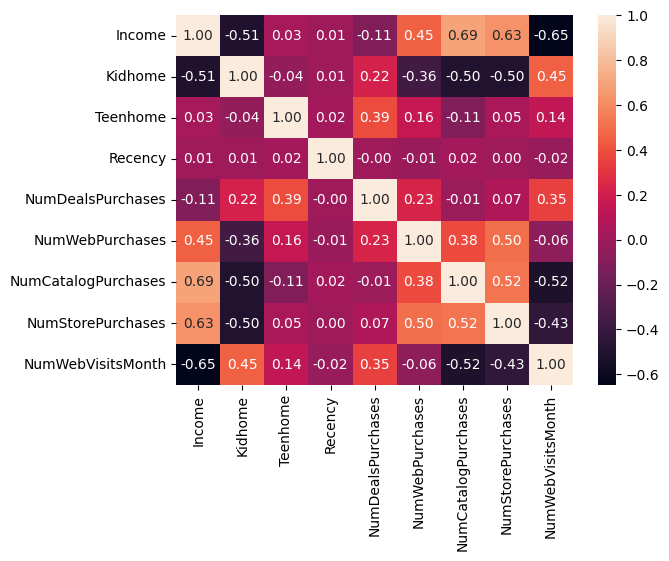

In [99]:
sns.heatmap(corr_columns.corr(), annot = True, fmt='.2f')

Insights :

1. Income and Num Catalogue Purchase & Income and Num Store Purchase are highly coupled. It means if Income is inceasing then Catalogue and store purchase are also increasing. Also, Kidhome and Income is negatively coupled, it means people who have higher income are not having kids at home or rarely be 1,2 kids at home. Also, higher income leads to less web visit to store.

2. People who have kids at home are preferring deals purchase instead of store, catalogue and web purchase. More kids at home leads for more web visits.

3. People who have teen at home are also preferring deals purchasing.

#Univariate, Bivariate & Multivariate Analysis

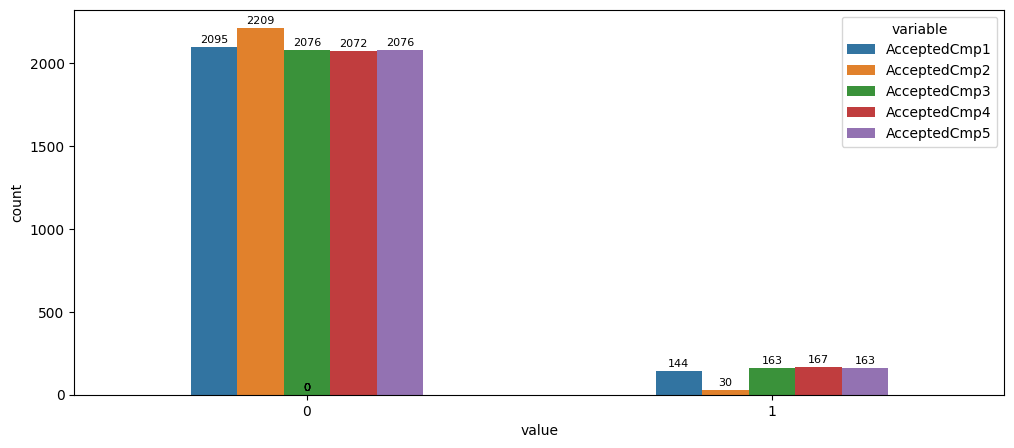

In [100]:
df_melted = df[["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]].melt()

plt.figure(figsize=(12, 5))
ax = sns.countplot(x="value", data=df_melted, hue="variable", width=0.5)

# Add count values on the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 3),
                textcoords='offset points')

plt.show()

Insights :

1. Most Successful Compaign is Campaign 4 : Customer Accepted Offer - 167, Customer Rejected Offer - 2072
2. Second Most Successful Campaign is Campaign 3 & 5 Both : Customer Accepted Offer - 163, Customer Rejected Offer - 2076
3. Third Most Successful Campaign is Campaign 4 : Customer Accepted Offer - 144, Customer Rejected Offer - 2095.
4. Least Successful Offer is Campaign 2 : Customer Accepted Offer - 30 only, Customer Rejected Offer - 2209.

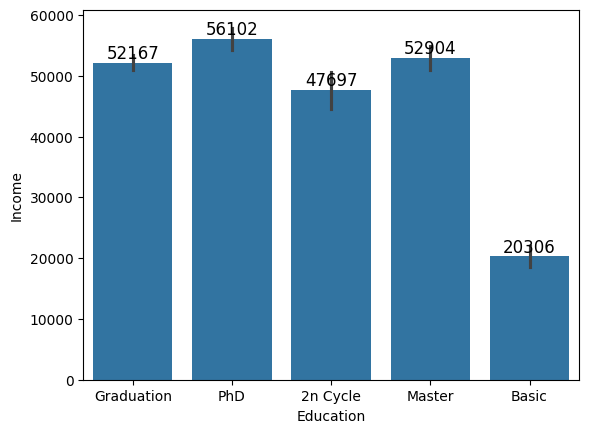

In [101]:
ax = sns.barplot(x = "Education", y = "Income", data = df)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 3),
                textcoords='offset points')

plt.show()

Insights :

Customer who have done PhD has the highest income following the customers who have done Masters. Then Customer who have done Graduation earning best, following the 2n Cycle Education. Customers with only Basic are earning the least.

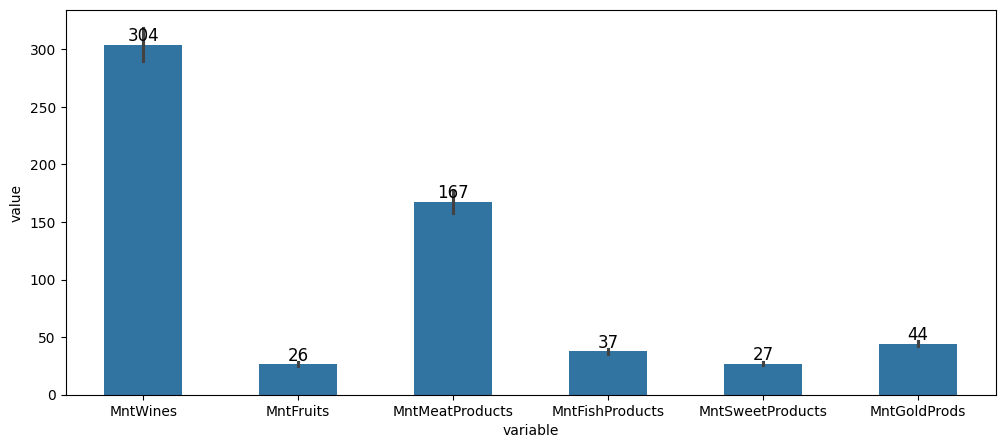

In [102]:
plt.figure(figsize = (12,5))
sales_data = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].melt()

ax = sns.barplot(x="variable", y="value", data=sales_data, width = 0.5)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 3),
                textcoords='offset points')

plt.show()

Insights :

Company is spending most on Wines, which is followed by Meat and then Gold Products, Fist Products. Spending on sweet and  fruits is almost same.

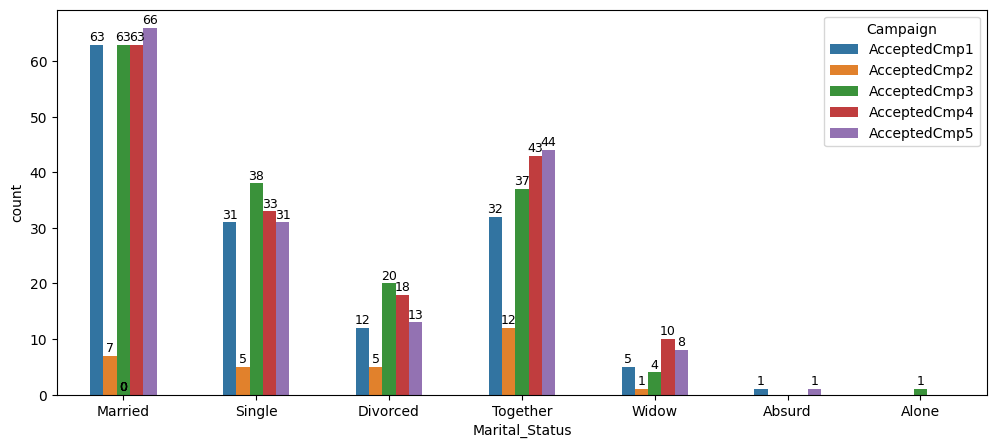

In [103]:
#Visualizing count of accepted offers for each marital_status

# Melt the DataFrame correctly
df_melted_marital = df.melt(id_vars="Marital_Status",
                            value_vars=["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"],
                            var_name="Campaign", value_name="Accepted")

# Filter out rows where 'Accepted' is not 1 (if necessary)
df_melted_marital = df_melted_marital[df_melted_marital["Accepted"] == 1]

# Plot the data
plt.figure(figsize=(12, 5))
ax = sns.countplot(x="Marital_Status", hue="Campaign", data=df_melted_marital, width=0.5)

# Annotate the bars with counts
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 3),
                textcoords='offset points')

plt.show()


Insights :

1. Married Customers are accepting campaigns most rather than others.
2. Together customers are also getting benefits from the campaigns and availing it at second posiiting.
3. At third positing we are seeing that single customers are attacted towards campaign.
4. Seems like divorced and window customers are not accepting campaign offers mostly.
5. Absurd and alone are not interested in campaign offers.
6. Amongest all the campaigns, campaign-2 didn't brought much benifit to the company.

Insights :



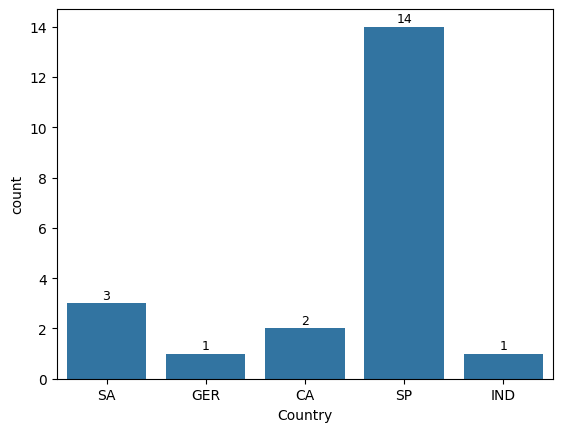

In [104]:
complain_data = df[df["Complain"]==1]
ax = sns.countplot(x = complain_data["Country"])

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 3),
                textcoords='offset points')

plt.show()

Insights :

Spain is having the most complain with the count of 14 and India is having the least complain count.

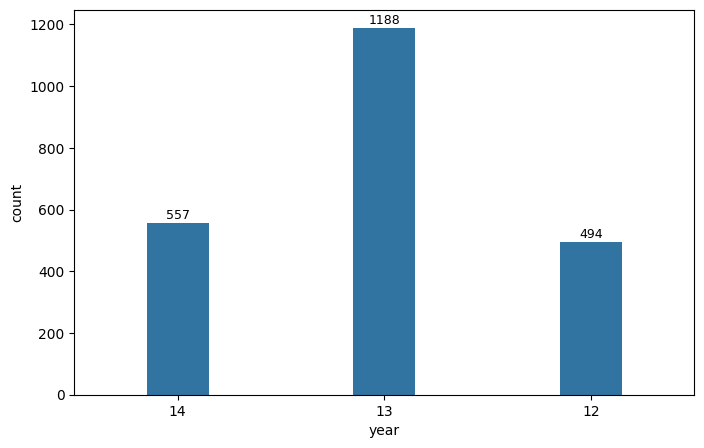

In [105]:
plt.figure(figsize = (8,5))
ax = sns.countplot(x = df["year"], width = 0.3)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 3),
                textcoords='offset points')

plt.show()

Insights :

In 13, customers enrollment was highest. while in 12, it is lowest.

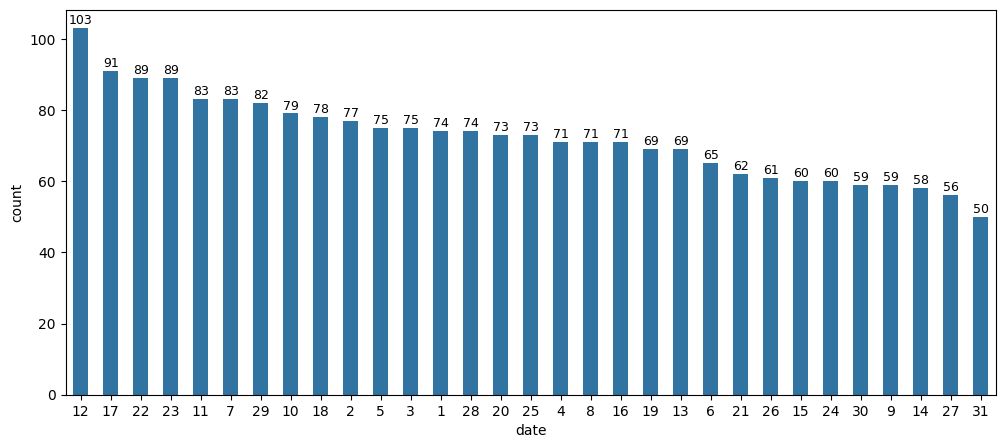

In [106]:
date_order = df["date"].value_counts().sort_values(ascending = False).index

df["date"] = pd.Categorical(df["date"], categories = date_order, ordered = True)

plt.figure(figsize = (12,5))
ax = sns.countplot(x = df["date"], width = 0.5)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 3),
                textcoords='offset points')

plt.show()


Insights :

Most of the customers enrolled on 12th of every month and least enrollment is in 31st of every month. Overall, what we can observe from this dataset is customers are enrolling through out the month.

#Hypothesis Testing:


## Question - Is income of customers dependent on their education?


Null Hypothesis (H0): The income of customers is independent of their education level. (All means are equal across education levels.)

Alternative Hypothesis (H1): The income of customers depends on their education level. (At least one mean is different.)

In [107]:
# one_way_ANOVA Test
# alpha = 0.05

import scipy.stats as stats

alpha = 0.05

educational_groups = [df["Income"][df["Education"] == level] for level in df["Education"].unique()]

f_stats, p_value = stats.f_oneway(*educational_groups) #perfrom ANOVA Test

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in income between education levels.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in income between education levels.")

Reject the null hypothesis. There is a significant difference in income between education levels.


##Question - Do higher income people spend more (take in account spending in all categories together)?

Null Hypothesis (H0): "Income and Total_spending are independent"

Alternate Hypothesis (H1): "Income and Total_spending are dependent"

In [108]:
# pearsonr
# alpha = 0.05

from scipy.stats import pearsonr

corr, p_value = pearsonr(df["Income"], df["Total_spending"])

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between income and total spending.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between income and total spending.")

Reject the null hypothesis. There is a significant correlation between income and total spending.


## Question - Do couples spend more or less money on wine than people living alone (set 'Married','Together':'In couple' and 'Divorced','Single','Absurd','Widow','YOLO':'Alone')


Null Hypothesis (H0) = There is no significant difference in average wine spending between couples and alone.

Alternate Hypothesis (H1) = There is a significant difference in average wine spending between couples and alone.

In [109]:
in_couple_df = df[df["Marital_Status"].isin(["Married", "Together"])]

In [110]:
alone_df = df[df["Marital_Status"].isin(["Single", "Divorced", "Widow", "Alone", "YOLO", "Absurd"])]

In [111]:
# ttest_ind
# alpha = 0.05

import scipy.stats as stats

t_stat, p_value = stats.ttest_ind(in_couple_df["MntWines"], alone_df["MntWines"])
t_stat, p_value

(-0.2712259990062464, 0.7862422428083654)

In [112]:
# z-test (2 tail test)
# alpha = 0.05

mean_diff = in_couple_df["MntWines"].mean() - alone_df["MntWines"].mean()
std_in_couple_df = np.std(in_couple_df["MntWines"], ddof=1)
std_alone_df = np.std(alone_df["MntWines"], ddof=1)
std_error_diff = np.sqrt((std_in_couple_df**2 / len(in_couple_df)) + (std_alone_df**2 / len(alone_df)))
z_stat = mean_diff / std_error_diff
p_value = 2*(1-stats.norm.cdf(np.abs(z_stat)))
z_stat, p_value

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in average wine spending between couples and alone.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average wine spending between couples and alone.")

Fail to reject the null hypothesis. There is no significant difference in average wine spending between couples and alone.


## Question - Are people with lower income are more attracted towards campaign or simply put accept more campaigns. ( create two income brackets one below median , other above median income and create a column which tells if they have ever accepted any campaign)


Null Hypothesis (H0) = There is no significant difference in Income and accepted campaign.

Alternate Hypothesis (H1) = There is a significant difference in Income and accepted campaign.

In [113]:
df_below_median = df[df["Income"] < df["Income"].median()]
df['AcceptedAnyCampaign'] = df_below_median[["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]].any(axis=1).astype(int)

In [114]:
df_above_median = df[df["Income"] >= df["Income"].median()]
df['AcceptedAnyCampaign'] = df_below_median[["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]].any(axis=1).astype(int)

In [115]:
# ttest_ind
# alpha = 0.05
t_stat, p_value = stats.ttest_ind(df["AcceptedAnyCampaign"], df["AcceptedAnyCampaign"])

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in Income and accepted campaign.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in Income and accepted campaign.")


Fail to reject the null hypothesis. There is no significant difference in Income and accepted campaign.


Insights and Recommendations :

1. High Variability in Income: With a standard deviation of 21,526 and income ranging from 1,730 to 162,397, there's a significant disparity between the low- and high-income segments. Half of the population earns between 35,284 and 68,487, with the mean (51,969) and median (51,373) close to each other, suggesting a fairly symmetrical distribution (All figures are in $).

  * Recommendation: Segment Marketing: Given the large income disparity, create tiered marketing strategies targeting different income brackets. High-income individuals are more likely to respond to luxury products, while low-income individuals might prefer budget-conscious offers.

2. Household Size (Kidhome and Teenhome): Most Households Are Child-Free: Over half (57.75%) of households have no children at home, and 51.67% of households have no campaign teenagers. The maximum number of children or teenagers per household is 2, which is rare.

  * Recommendation: Target Single Adults and Child-Free Couples: Focus campaigns and products on singles and couples without children, as they make up the majority of the customer base.

3. Recency (Days Since Last Purchase): Average Recency is 49 Days: While some customers purchased recently, others have not engaged in up to 99 days. The high standard deviation of 28.96 days shows varied shopping frequency.

  * Recommendation:
    * Re-engagement Campaigns: Target customers who haven't purchased in 60+ days with personalized offers or reminders to drive retention.

    * Monetary Expenditure Across Categories:

4.  Wine Spending: High-income individuals spend more on wines (mean: di h 304 ) ith , w somespen ngasmuc as 1,493. Low-income customers spend significantly less on wine (25th percentile: $24).

  * Recommendation:

    * Luxury vs Budget Wine Marketing: High-income individuals could be targeted with premium wine selections, while budget-friendly wines should appeal to lowerincome customers.

5.  Meat, Fish, Sweets, and Gold Product Spending: High-income individuals dominate these categories, while lower-income groups have limited spending power. Spending is more consistent across middle- and low-income groups, but lowerincome households tend to limit luxury expenditures.

  * Recommendation:
    * Upsell Meat and Gold Products to High-Income Groups: Create tailored campaigns that emphasize premium quality for high-income individuals and offer value deals for lower-income segments.

5. Purchase Behavior: Store Purchases Dominate: On average, people make more in-store purchases (mean: 5.79) compared to web purchases (mean: 4).

  * Outliers in Web and Catalog Purchases: There are some customers who purchase heavily online (maximum web purchases: 27; catalog: 28), though most customers make fewer web/catalog purchases.

  * Recommendation:

    * Hybrid Shopping Strategy: Encourage online shopping for frequent in-store customers by offering online-exclusive deals. Focus on store-based promotions to maintain the engagement of in-store shoppers.

6. Campaign Acceptance: Low Campaign Acceptance: Only about 7% of customers accept any particular campaign. Despite this, there are no major complaints (complaint rate: 0.009).

  * Recommendation:

    * Personalize Campaigns: Increase campaign acceptance by tailoring offers to individual preferences (e.g., wine offers for high-income customers or family discounts for customers with children).

7. Education Distribution: Highly Educated Population: Over 80% of the population has at least a graduate degree, with 21.71% holding PhDs.

  * Recommendation:

    * Leverage Educational Targeting: Promote products or services that resonate with well-educated individuals, such as high-end, quality-driven goods or tech-oriented products.

8. Marital Status Distribution: Family-Oriented Population: The majority of the population (64.45%) is in a relationship or living with a partner. However, a sizable minority (35.55%) are living alone.

  * Recommendation:

    * Custom Messaging for Couples vs Singles: Develop different marketing messages for couples (e.g., family-oriented promotions) and single individuals (e.g., convenience products).

9. Spending Patterns and Income Groups: Spending Increases with Income: High-income individuals consistently spend more across all categories. Low-income individuals, meanwhile, are constrained in luxury spending categories like wine, gold, and meat.

  * Recommendation:

    * Targeted Promotions for Income Levels: Upsell premium products to high-income individuals and provide discount offers to lower-income groups to improve engagement across both brackets.

10. Hypothesis Testing Results: Wine Spending and Marital Status: The Mann-Whitney U test shows no significant difference in wine spending between couples and individuals living alone. Therefore, there is no need for differentiated pricing or campaigns based on marital status for wine products. Campaign Acceptance and Income:

11. The chi-square test indicates that lower-income individuals are more likely to accept campaigns, suggesting that price-sensitive segments respond better to offers. Income and Total Spending:

12. With a p-value of 0, which is less than the significance level (0.05), we reject the null hypothesis. This confirms that there is a significant difference in spending across income campaign groups, with higher-income individuals spending more across all categories. Income and Education:

13. The p-value for both the chi2_contingency and Kruskal-Wallis tests is very low, leading us to reject the null hypothesis. This means that education level has a significant impact on income—higher education levels are linked to higher incomes. Recommendations:

14. Price Sensitivity: Target lower-income groups with discounts, deals, and personalized promotions to increase campaign acceptance.

15. Spending Differences Across Income Groups: Focus premium products and services on higher-income segments, as they demonstrate significantly higher spending capacity across all categories.

16. Education-Linked Income: Use education data to segment customers and market high-end products to individuals with higher education levels, who tend to have higher incomes and greater spending potential.

17. Tailor premium products and services towards higher-income segments as they have a significantly higher spending capacity across all categories. Education-Linked Income:

18. Leverage education data to segment customers, focusing high-end product marketing on customers with higher education levels, who tend to have higher incomes and spending potential.